In [1]:
# 1. Data Preparation
# First, load the data and inspect its structure. You can do this using Python and libraries like Pandas and Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Walmart Sales dataset
data = pd.read_csv('Walmart_Sales.csv')

# Inspect the data structure
print(data.head())
print(data.info())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

# 2. Data Preprocessing
Before analyzing and visualizing, clean and preprocess the data:

Check for missing values: Handle missing or null values.
Convert data types: Ensure columns like Date are in the correct format.

In [2]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="mixed")

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values as appropriate
data.fillna(0, inplace=True)  # Example: filling missing values with 0


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


# 3. Data Visualization
Next, create various visualizations to understand the data patterns and trends.

3.1. Sales Trend Over Time
You can visualize the weekly sales trend to see how sales have evolved over time.

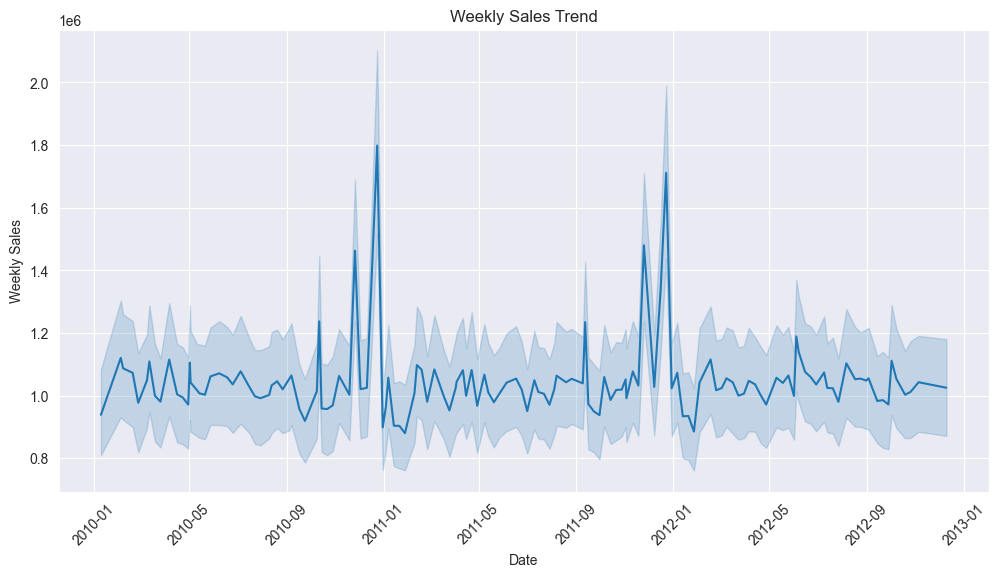

In [7]:
# Plot Weekly Sales Trend over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()


Impact on Business:

Analyzing sales trends helps identify peaks (e.g., during holidays) and slumps, which can guide inventory and staffing decisions.
3.2. Impact of Holidays on Sales
Use the Holiday_Flag to analyze if holidays influence sales.

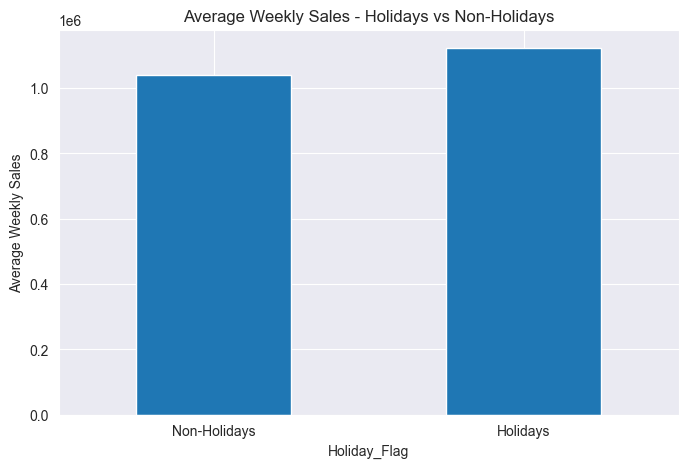

In [8]:
# Sales comparison on Holidays vs Non-Holidays
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar')
plt.title('Average Weekly Sales - Holidays vs Non-Holidays')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holidays', 'Holidays'], rotation=0)
plt.show()


Impact on Business:

Identifying the effect of holidays on sales helps optimize promotions, marketing, and staffing during peak periods.
3.3. Effect of Temperature on Sales
Explore if the local temperature impacts sales, especially for certain categories (e.g., seasonal items).

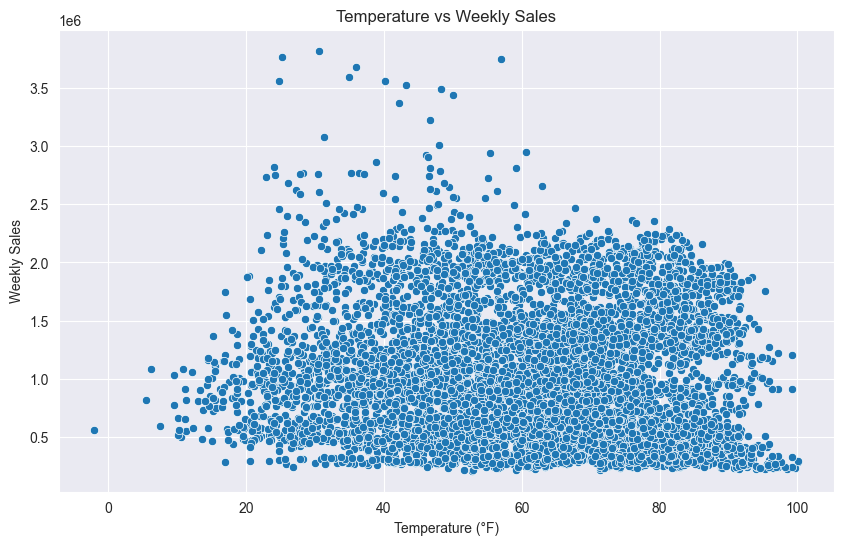

In [9]:
# Scatter plot: Temperature vs Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.show()


Impact on Business:

Weather conditions influence buying behavior. For example, high temperatures may boost the sales of cold drinks or summer clothing.
3.4. Fuel Price vs Sales
Fuel prices may affect consumer spending patterns. Visualizing this relationship could help Walmart optimize pricing and promotions.

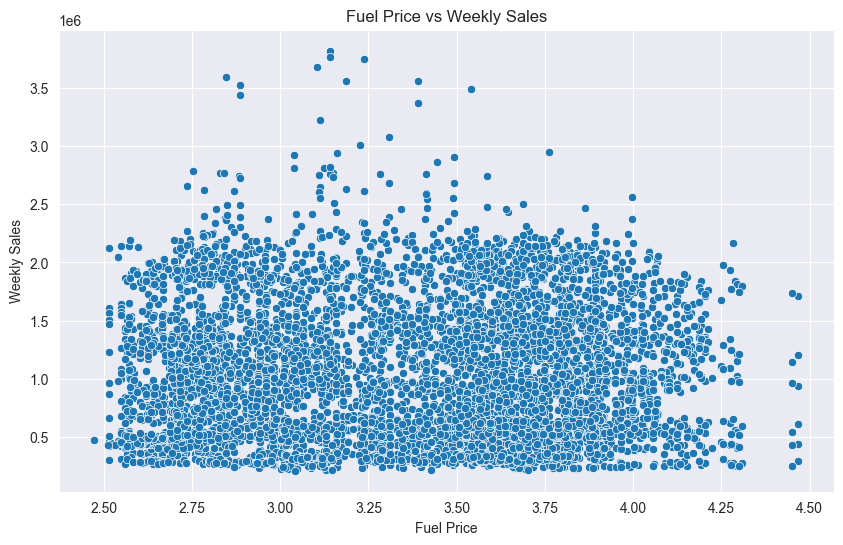

In [10]:
# Scatter plot: Fuel Price vs Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


Impact on Business:

A higher fuel price can reduce disposable income, affecting sales, especially for non-essential goods.

# 4. Predictive Modeling
Using Big Data, you can forecast future sales based on historical data. Let's build a simple Linear Regression model to predict Weekly Sales.

4.1. Prepare Data for Modeling
Split the data into training and testing sets. Use features like Temperature, Fuel_Price, CPI, Unemployment, and Holiday_Flag to predict Weekly_Sales.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Features (independent variables)
X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]

# Target variable (dependent variable)
y = data['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 475432.53295882524


Impact on Business:

Predicting future sales helps optimize inventory levels, reduce overstocking or stockouts, and improve demand forecasting accuracy.
4.2. Visualize Model Performance
Visualizing actual vs predicted sales can help evaluate the model’s performance.

In [ ]:
# Compare actual vs predicted sales
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred, label='Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


Impact on Business:

The ability to predict future sales accurately allows Walmart to make data-driven decisions, such as optimizing stock levels and reducing costs.
# 5. Conclusion
Summarize the business impact of Big Data:

Sales Forecasting: Predicting sales trends enables more effective supply chain management and ensures that inventory matches demand, avoiding both overstock and stockouts.
Consumer Behavior: By analyzing how external factors (holidays, temperature, fuel prices, etc.) affect sales, Walmart can tailor marketing and promotions.
Risk Management: Big Data helps assess the risk of future sales fluctuations due to external factors like unemployment or economic conditions.
Operational Efficiency: Real-time sales data analysis supports efficient scheduling and staffing, especially during high-demand periods like holidays.

# Next Steps:
In a more advanced project, you could:

Use more sophisticated models (e.g., decision trees, random forests, or deep learning).
Integrate additional external data (e.g., competitor pricing, social media sentiment analysis).
Build an interactive dashboard for real-time sales analysis.